## Data Preparation

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Import data

df1 = pd.read_csv('Dataset/Tokopedia Data Scrap 1 - Kopi.csv', sep=';')
df2 = pd.read_csv('Dataset/Tokopedia Data Scrap 2 - Kopi.csv', sep=';')
df3 = pd.read_csv('Dataset/Tokopedia Data Scrap 3 - Kopi.csv', sep=';')
df4 = pd.read_csv('Dataset/Tokopedia Data Scrap 4 - Kopi.csv', sep=';')
df5 = pd.read_csv('Dataset/Tokopedia Data Scrap 5 - Kopi.csv', sep=';')

df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
#df

In [10]:
#Add column and clean data

#Clean Duplicate
df = df.drop_duplicates()


#Remove Wrong Data
df = df[~df['Nama Produk'].str.contains('Biji Kopi Hijau|cupping tray|green bean|greenbean|mentah|mentah|bibit|500 ml|500ml|cair|benih|basket|keranjang|stainless', case=False)]
df = df[~df['Toko'].str.contains('PETANI JKT', case=False)]

# Turn string to Float on Column 'Discount'
df['Diskon'] = df['Diskon'].str.replace('%', '').astype(int)


#Cleaning kolom 'Lokasi'
df['Lokasi'] = df['Lokasi'].str.replace('-', 'Other')
df.loc[df['Toko'].str.contains('Tuang Coffee', case=False), 'Lokasi'] = 'Jakarta Selatan'
df.loc[df['Toko'].str.contains('Hatana Coffee', case=False), 'Lokasi'] = 'Medan'
df.loc[df['Toko'].str.contains('Kopi Luwak Official', case=False), 'Lokasi'] = 'Jakarta'
df.loc[df['Toko'].str.contains('Arutala Online Co.', case=False), 'Lokasi'] = 'Tangerang'
df.loc[df['Toko'].str.contains('Say Something Coffee', case=False), 'Lokasi'] = 'Jakarta Barat'
df.loc[df['Toko'].str.contains('Kawaki Roastery', case=False), 'Lokasi'] = 'Jakarta Selatan'
df.loc[df['Toko'].str.contains('Toko Kopi Gayo', case=False), 'Lokasi'] = 'Kab. Aceh Tengah'
df.loc[df['Toko'].str.contains('Senja Mataram', case=False), 'Lokasi'] = 'Malang'
df.loc[df['Toko'].str.contains('Leite Coffee', case=False), 'Lokasi'] = 'Malang'
df.loc[df['Toko'].str.contains('Kepala Djenggot Official', case=False), 'Lokasi'] = 'Tengerang'


#Cleaning kolom 'Terjual'
df['Terjual'] = df['Terjual'].str.replace('Terjual ', '')


# Estimasi terjual berdasarkan kolom 'Terjual'
# Replace '+' with an empty string and 'rb+' with '000' in the 'Estimasi Terjual' column
df['Estimasi Terjual'] = df['Terjual'].str.replace('+', '', regex=True).str.replace(' rb+', '000', regex=True).str.replace('-', '0', regex=True)
# Convert the resulting strings to integers
df['Estimasi Terjual'] = pd.to_numeric(df['Estimasi Terjual'])


#Kolom Rating dari string ke angka
# df['Rating'] = df['Rating'].str.replace('-', '0', regex=True)
# df['Rating'] = pd.to_numeric(df['Rating'])


# Jenis Kopi (Arabika, Robusta, Blend)
df['Jenis'] = df['Nama Produk'].str.extract(r'(arabica|arabika|robusta|liberika|liberica)', flags=re.IGNORECASE, expand=False)
df['Jenis'] = df['Jenis'].fillna('Other')

df.loc[df['Nama Produk'].str.contains('blend', case=False), 'Jenis'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('mix', case=False), 'Jenis'] = 'Blend'

df.loc[df['Nama Produk'].str.contains('arabica', case=False) & df['Nama Produk'].str.contains('robusta', case=False), 'Jenis'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('arabica', case=False) & df['Nama Produk'].str.contains('liberika', case=False), 'Jenis'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('arabika', case=False) & df['Nama Produk'].str.contains('robusta', case=False), 'Jenis'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('arabika', case=False) & df['Nama Produk'].str.contains('liberika', case=False), 'Jenis'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('liberika', case=False) & df['Nama Produk'].str.contains('robusta', case=False), 'Jenis'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('liberica', case=False) & df['Nama Produk'].str.contains('robusta', case=False), 'Jenis'] = 'Blend'

df['Jenis'] = df['Jenis'].apply(lambda x: " ".join(word.capitalize() for word in x.split()))
df['Jenis'] = df['Jenis'].str.replace('Arabica', 'Arabika')

# Proses kopi (Natural, Full Washed, dll)
df['Proses'] = df['Nama Produk'].str.extract(r'(honey|luwak|natural|wine|wash|full washed|fullwash|semi wash|semiwash|semi washed|honey)', flags=re.IGNORECASE, expand=False)
df['Proses'] = df['Proses'].fillna('Other')
df.loc[df['Nama Produk'].str.contains('blend', case=False), 'Proses'] = 'Other'
df.loc[df['Nama Produk'].str.contains('mix', case=False), 'Proses'] = 'Other'
df['Proses'] = df['Proses'].apply(lambda x: " ".join(word.capitalize() for word in x.split()))
df['Proses'] = df['Proses'].str.replace('Full Washed', 'Wash').str.replace('Fullwash', 'Wash')


# Origin kopi
origin_keywords = r'suwarnadwipa|sumatra|gayo|sidikalang|lintong|mandailing|Mandheling|kerinci|solok|pagar alam|lereng kaba|pagaralam|semendo|lampung|sumsel|jambi|meranti|bengkulu|halu|palintang|cibunar|mukapayung|java|preanger|sumedang|sunda|kamojang|ciwidey|rancabali|manglayang|malabar|papandayan|semeru|garut|puntang|ijen|temanggung|dampit|senduro|arjuno|toraja|mamasa|latimojong|bali|kintamani|flores|papua|wamena|kilimanjaro tanzania|kenya kirinyaga|sakicha|Colombia El Diviso|burundi|yirgacheffe|sidamo|hawaii|congo|guatemala|brazil|honduras|india|vietnam'


df['Origin'] = df['Nama Produk'].str.extract(rf'({origin_keywords})', flags=re.IGNORECASE, expand=False).fillna('Other')
df.loc[df['Nama Produk'].str.contains('blend', case=False), 'Origin'] = 'Blend'
df.loc[df['Nama Produk'].str.contains('Tuang Coffee'), 'Origin'] = 'Flores'
df['Origin'] = df['Origin'].apply(lambda x: x.capitalize().replace('-', 'Other'))
df.loc[df['Nama Produk'].str.contains('Simalem', case=False), 'Origin'] = 'Simalem'
df.loc[df['Nama Produk'].str.contains('Gayo', case=False), 'Origin'] = 'Gayo'
df.loc[df['Nama Produk'].str.contains('Ijen', case=False), 'Origin'] = 'Ijen'
df.loc[df['Nama Produk'].str.contains('Temanggung', case=False), 'Origin'] = 'Temanggung'
df.loc[df['Nama Produk'].str.contains('Palintang', case=False), 'Origin'] = 'Palintang'

# Origin Negara kopi (Lokal/Int)
def get_negara(origin):
    lokal_keywords = r'suwarnadwipa|sumatra|gayo|sidikalang|lintong|mandailing|Mandheling|kerinci|solok|pagar alam|lereng kaba|pagaralam|semendo|lampung|sumsel|jambi|meranti|bengkulu|halu|palintang|cibunar|mukapayung|java|preanger|sumedang|sunda|kamojang|ciwidey|rancabali|manglayang|malabar|papandayan|semeru|garut|puntang|ijen|temanggung|dampit|senduro|arjuno|toraja|mamasa|latimojong|bali|kintamani|flores|papua|wamena|'
    if any(re.findall(lokal_keywords, origin.lower())):
        return 'Lokal'
    elif any(country in origin.lower() for country in ['kilimanjaro tanzania', 'kenya kirinyaga', 'Burundi', 'sakicha', 'colombia el diviso', 'yirgacheffe', 'sidamo', 'hawaii', 'congo', 'guatemala', 'brazil', 'honduras', 'india', 'vietnam']):
        return 'Internasional'
    else:
        return 'Other'
# Kolom Negara
df['Negara'] = df['Origin'].apply(get_negara)  
    

# Jumlah gramasi kopi (100 gr, 150 gr, 200 gr, 250 gr, 1 kg, 10 gr)
df['Jumlah gram'] = df['Nama Produk'].str.extract(r'(100gr|100 gr|100 gram|150gr|150 gr|150 gram|200gr|200 gr|200 gram|250gr|250 gr|250 gram|500gr|500 gr|500 gram|1 kg|1kg)', flags=re.IGNORECASE, expand=False)
df['Jumlah gram'] = df['Jumlah gram'].fillna('Other')
df['Jumlah gram'] = df['Jumlah gram'].apply(lambda x: " ".join(word.capitalize() for word in x.split()))
df['Jumlah gram'] = df['Jumlah gram'].replace({'1 Kg': '1000', '1kg': '1000', '10 Gr': '10', '200 Gr': '200', '250 Gr': '250','200gr':'200', '500 Gr':'500', '100gr':'100', '250gr':'250', '100 Gr':'100', '500gr':'500', '150 Gr':'150', '780 Gr':'780', '380 Gr':'380'})

       
# # Harga
# Define the regular expression pattern to match
pattern = r"\D"
# Remove non-numeric characters from the "harga" column
df['Harga'] = df['Harga'].str.replace(pattern, "", regex=True)
# Convert the resulting strings to integers
df['Harga'] = pd.to_numeric(df['Harga'])


# # Harga Sebelum Diskon
# Define the regular expression pattern to match
pattern = r"\D"
# Remove non-numeric characters from the "harga" column
df['Harga Sebelum Diskon'] = df['Harga Sebelum Diskon'].str.replace(pattern, "", regex=True)
# Convert the resulting strings to integers
df['Harga Sebelum Diskon'] = pd.to_numeric(df['Harga Sebelum Diskon'])

In [11]:
# df

In [12]:
# Cek Nilai Unik pada 'Kolom'
df['Proses'].unique()

array(['Other', 'Wine', 'Wash', 'Natural', 'Honey', 'Luwak'], dtype=object)

In [13]:
# Urutan berdasarkan 'Kolom'
# df.sort_values('Diskon', ascending=False).head(5)

In [31]:
# Cek pada 'Kolom' apakah mengandung 'Value' tertentu
df[df['Origin'].str.contains('Sumatra', case=False)]
# df[df['Jumlah gram'] == '100']

,Nama Produk,Harga,Diskon,Harga Sebelum Diskon,Lokasi,Toko,Rating,Terjual,Estimasi Terjual,Jenis,Proses,Origin,Negara,Jumlah gram
6248,Starbucks Sumatra - Whole Bean Dark Roast 250g...,125000,0,125000,Jakarta Barat,Whitesides,4.9,80+,80,Other,Other,Sumatra,Lokal,250
22901,KOPI BIJI SUMATRA ROBUSTA PREMIUM COFFEE BEANS...,46000,0,46000,Jakarta Selatan,Sumatra Highlands,5.0,40+,40,Robusta,Other,Sumatra,Lokal,200


In [ ]:
# Mengubah nilai 'Kolom' menjadi list
# df[df['Nama Produk'].str.contains('excelsa', case=False)]['Nama Produk'].values.tolist()

In [32]:
df.to_csv('Tokopedia - Kopi complete.csv', index=False, sep=';')

## Data Analysis and Visualization

#### A. Toko dengan Penjualan Estimasi Terbanyak 

In [101]:
Penjualan_toko = df.groupby('Toko').agg({'Estimasi Terjual': 'sum', 'Rating': 'mean'})
Penjualan_toko = Penjualan_toko.sort_values('Estimasi Terjual', ascending=False)
Penjualan_toko

,Estimasi Terjual,Rating
Toko,,
Tuang Coffee,107500,4.976471
Arutala Online Co.,72978,4.912000
Tanamera Coffee,29750,4.992857
VOTRRO Coffee,28000,4.920000
Sakha Coffee Roastery,25310,4.963636
...,...,...
COFFEE GABUT,0,0.000000
Tukang Gudang,0,0.000000
ukupedia,0,0.000000


In [102]:
# Penjualan_toko.to_csv('Penjualan Toko.csv', index=False)

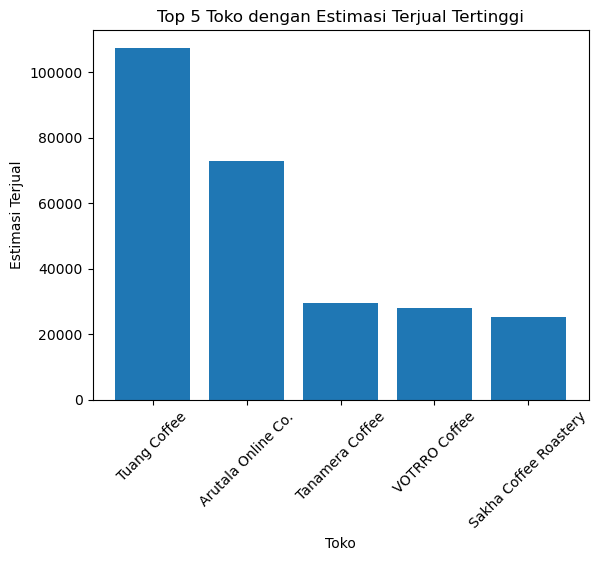

In [103]:
# Create a bar chart
# get top 5 rows
top_5pt = Penjualan_toko.iloc[:5]

# create bar plot
plt.bar(top_5pt.index, top_5pt['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Toko')
plt.ylabel('Estimasi Terjual')
plt.title('Top 5 Toko dengan Estimasi Terjual Tertinggi')
plt.xticks(rotation=45)

# display plot
plt.show()

#### B. Daerah dengan Penjualan Estimasi Terbanyak 

In [104]:
Penjualan_daerah = df.groupby('Lokasi').agg({'Estimasi Terjual': 'sum', 'Rating': 'mean'})
Penjualan_daerah = Penjualan_daerah.sort_values('Estimasi Terjual', ascending=False)
Penjualan_daerah

,Estimasi Terjual,Rating
Lokasi,,
Jakarta Selatan,141038,4.933333
Tangerang,79270,4.880000
Jakarta Utara,62125,4.746154
Jakarta Barat,56552,4.870000
Tangerang Selatan,40685,4.983333
Bandung,36561,4.840476
Jakarta Timur,32000,4.329412
Bekasi,29128,4.968182
Kab. Sleman,26500,4.614286


In [105]:
# Penjualan_daerah.to_csv('Penjualan Daerah.csv', index=False)

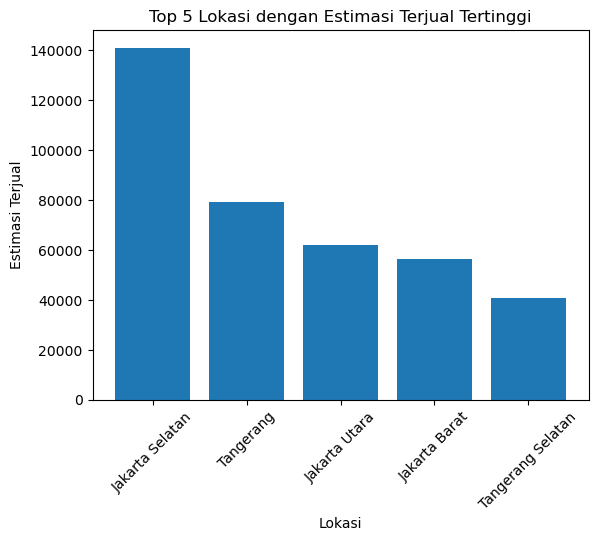

In [106]:
# Create a bar chart
# get top 5 rows
top_5pd = Penjualan_daerah.iloc[:5]

# create bar plot
plt.bar(top_5pd.index, top_5pd['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Lokasi')
plt.ylabel('Estimasi Terjual')
plt.title('Top 5 Lokasi dengan Estimasi Terjual Tertinggi')
plt.xticks(rotation=45)

# display plot
plt.show()

#### C. Origin, Negara dan Proses Paska Panen dengan Penjualan Estimasi Terbanyak

In [107]:
Penjualan_per_Origin = df.groupby('Origin').agg({'Estimasi Terjual': 'sum'})
Penjualan_per_Origin = Penjualan_per_Origin.sort_values('Estimasi Terjual', ascending=False)
Penjualan_per_Origin

,Estimasi Terjual
Origin,
Other,142728
Flores,124241
Blend,75331
Gayo,69307
Toraja,43469
...,...
Senduro,7
Burundi,6
Colombia el diviso,5


In [108]:
# Penjualan_per_Origin.to_csv('Penjualan Origin.csv', index=False)

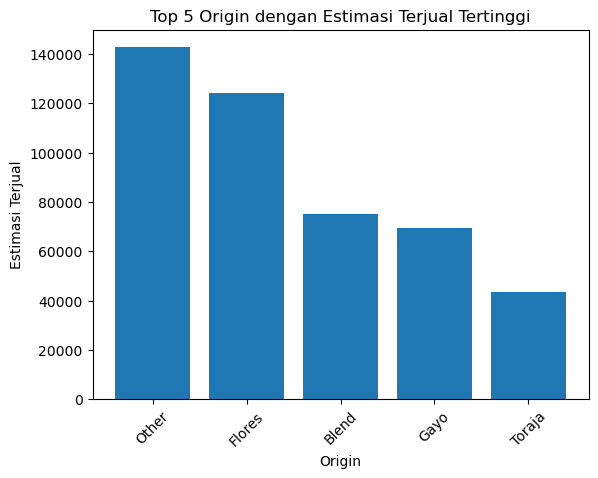

In [109]:
# Create a bar chart
# get top 5 rows
top_5po = Penjualan_per_Origin.iloc[:5]

# create bar plot
plt.bar(top_5po.index, top_5po['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Origin')
plt.ylabel('Estimasi Terjual')
plt.title('Top 5 Origin dengan Estimasi Terjual Tertinggi')
plt.xticks(rotation=45)

# display plot
plt.show()

In [110]:
#Perbandingan perkiraan penjualan kopi lokal dan interansional

In [111]:
Penjualan_per_Negara = df.groupby('Negara').agg({'Estimasi Terjual': 'sum'})
Penjualan_per_Negara = Penjualan_per_Negara.sort_values('Estimasi Terjual', ascending=False)
Penjualan_per_Negara = Penjualan_per_Negara.reset_index()
Penjualan_per_Negara

,Negara,Estimasi Terjual
0,Lokal,398587
1,Other,242765
2,Internasional,9267


In [112]:
# Penjualan_per_Negara.to_csv('Penjualan Negara.csv', index=False)

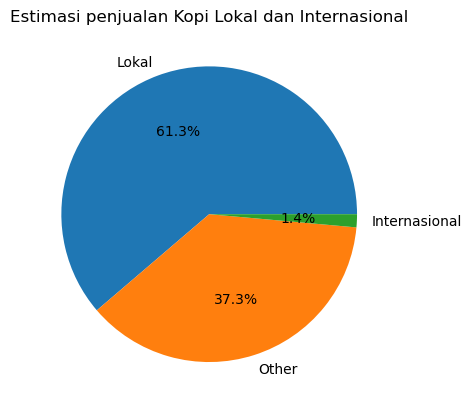

In [113]:
labels = Penjualan_per_Negara['Negara']
sizes = Penjualan_per_Negara['Estimasi Terjual']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Estimasi penjualan Kopi Lokal dan Internasional')

# Show the chart
plt.show()

In [114]:
Penjualan_per_Proses = df.groupby('Proses').agg({'Estimasi Terjual': 'sum'})
Penjualan_per_Proses = Penjualan_per_Proses.sort_values('Estimasi Terjual', ascending=False)
#Penjualan_per_Proses = [row for row in Penjualan_per_Proses if row[0] != 'Other']
Penjualan_per_Proses

,Estimasi Terjual
Proses,
Other,525397
Natural,61733
Wash,30260
Wine,25380
Luwak,5451
Honey,2398


In [115]:
# Penjualan_per_Proses.to_csv('Penjualan Per Proses.csv', index=False)

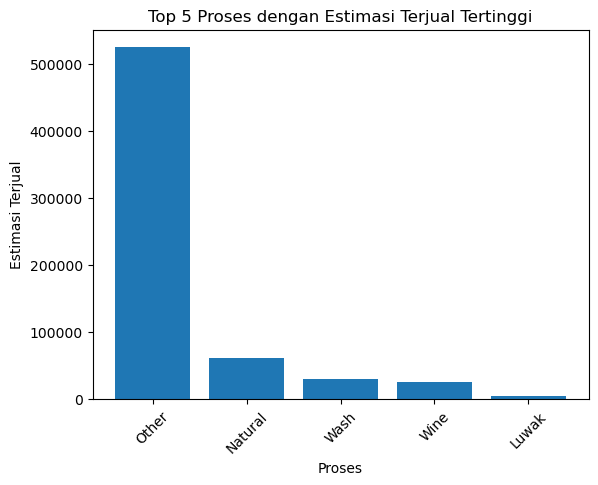

In [116]:
# Create a bar chart
# get top 5 rows
top_5p = Penjualan_per_Proses.iloc[:5]

# create bar plot
plt.bar(top_5p.index, top_5p['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Proses')
plt.ylabel('Estimasi Terjual')
plt.title('Top 5 Proses dengan Estimasi Terjual Tertinggi')
plt.xticks(rotation=45)

# display plot
plt.show()

#### D. Penjualan Estimasi Arabika, Robusta, Ekselsa

In [117]:
Penjualan_jenis_kopi = df
Penjualan_jenis_kopi['Jenis'] = Penjualan_jenis_kopi['Jenis'].replace(['Liberika', 'Excelsa'], 'Other')
Penjualan_jenis_kopi = Penjualan_jenis_kopi.groupby('Jenis').agg({'Estimasi Terjual': 'sum'})
Penjualan_jenis_kopi = Penjualan_jenis_kopi.sort_values('Estimasi Terjual', ascending=False)
Penjualan_jenis_kopi = Penjualan_jenis_kopi.reset_index()
Penjualan_jenis_kopi

,Jenis,Estimasi Terjual
0,Robusta,288345
1,Arabika,193979
2,Blend,133397
3,Other,34898


In [118]:
# Penjualan_jenis_kopi.to_csv('Penjualan Per Jenis.csv', index=False)

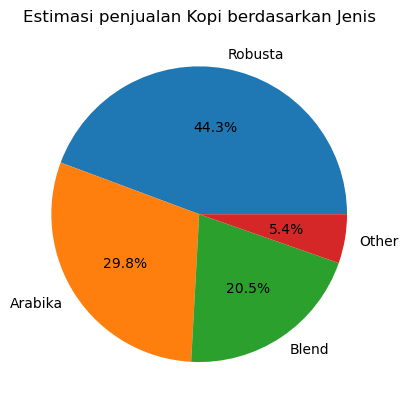

In [119]:
labels = Penjualan_jenis_kopi['Jenis']
sizes = Penjualan_jenis_kopi['Estimasi Terjual']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Estimasi penjualan Kopi berdasarkan Jenis')

# Show the chart
plt.show()

#### E. Jenis Jumlah Gram Kemasan dengan Penjualan Estimasi Tertinggi

In [120]:
Penjualan_jml_gr = df.groupby('Jumlah gram').agg({'Estimasi Terjual': 'sum'})
Penjualan_jml_gr = Penjualan_jml_gr.sort_values('Estimasi Terjual', ascending=False)
Penjualan_jml_gr

,Estimasi Terjual
Jumlah gram,
1000,212640
Other,210902
250,133733
200,41727
500,32250
100,16167
150,3200


In [121]:
# Penjualan_jml_gr.to_csv('Penjualan Per gram.csv', index=False)

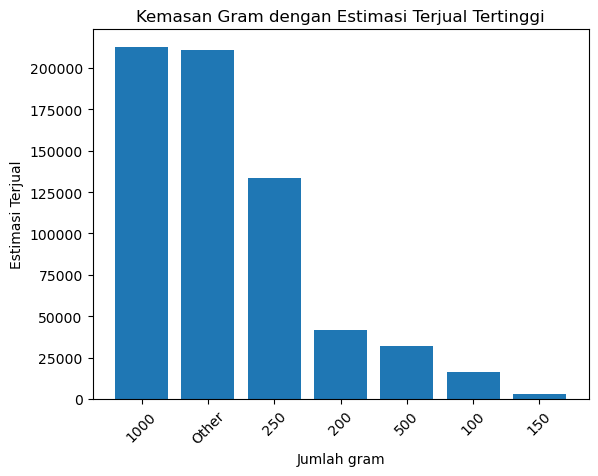

In [122]:
# Create a bar chart
# create bar plot
plt.bar(Penjualan_jml_gr.index, Penjualan_jml_gr['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Jumlah gram')
plt.ylabel('Estimasi Terjual')
plt.title('Kemasan Gram dengan Estimasi Terjual Tertinggi')
plt.xticks(rotation=45)

# display plot
plt.show()

#### F. Korelasi harga dan terjual 

In [123]:
Harga_dan_Terjual = df.loc[:, ['Nama Produk','Harga', 'Estimasi Terjual']] 
Harga_dan_Terjual = Harga_dan_Terjual.sort_values('Harga', ascending=False)
Harga_dan_Terjual

,Nama Produk,Harga,Estimasi Terjual
19169,Kona Coffee Hawaii 100% Peaberry Medium Roast ...,750000,5
43573,Kopi Luwak Authentic Arabica 150 Gr,744610,100
4850,Kopi Arabika Ethiopia Yirgacheffe 1 KG Special...,502000,50
30,Kopi Arabika Tanamera Coffee Premium Blend 1Kg,463000,750
48,Kopi Arabika Tanamera Coffee Sumatera: Mandail...,462000,500
...,...,...,...
76,Robeans Self Drip Coffee | Kopi Tetes Arabika ...,9000,250
22858,Kopi Drip Robusta Mandailing dengan Filter Bag...,8000,100
32616,Ka.Mu kopi Robusta Pagar Alam - Plastik bening...,6000,40
22844,Ka.Mu kopi Robusta Pagar Alam,6000,40


In [124]:
# Harga_dan_Terjual.to_csv('Harga dan Terjual.csv', index=False)

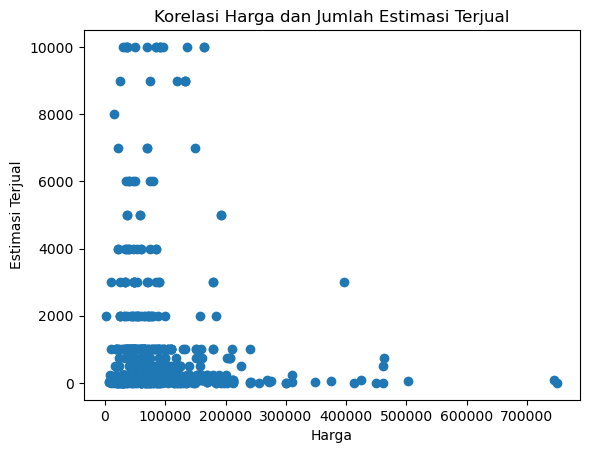

In [125]:
# create scatter plot
plt.scatter(Harga_dan_Terjual['Harga'], Harga_dan_Terjual['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Harga')
plt.ylabel('Estimasi Terjual')
plt.title('Korelasi Harga dan Jumlah Estimasi Terjual')

# display plot
plt.show()

#### 7. Korelasi rating dan terjual 

In [126]:
Rating_dan_Terjual = df.loc[:, ['Nama Produk','Rating', 'Estimasi Terjual']]
Rating_dan_Terjual = Rating_dan_Terjual.sort_values('Estimasi Terjual', ascending=False)
Rating_dan_Terjual

,Nama Produk,Rating,Estimasi Terjual
6227,Roasted Bean Premium Robusta Natural Tuang Cof...,5.0,10000
23407,ARUTALA Kopi Toraja Rantebua Robusta Coffee In...,4.9,10000
17,Kopi Aroma Mocca Arabika Bandung,4.9,10000
45661,Roasted Bean Primo Blend Tuang Coffee (Arabica...,5.0,10000
45656,Roasted Bean Premium Robusta Natural Tuang Cof...,5.0,10000
...,...,...,...
43617,Kopi Liberco Liberika Sambas 200gr Kopi Bubuk ...,0.0,0
37179,"kopi Robusta - fine, 500gram",0.0,0
37181,KOPI ROBUSTA 1KG,0.0,0
43580,Kopi Bubuk Blend Robusta & Liberika 250gr | Ko...,0.0,0


In [127]:
# Rating_dan_Terjual.to_csv('Rating dan Terjual.csv', index=False)

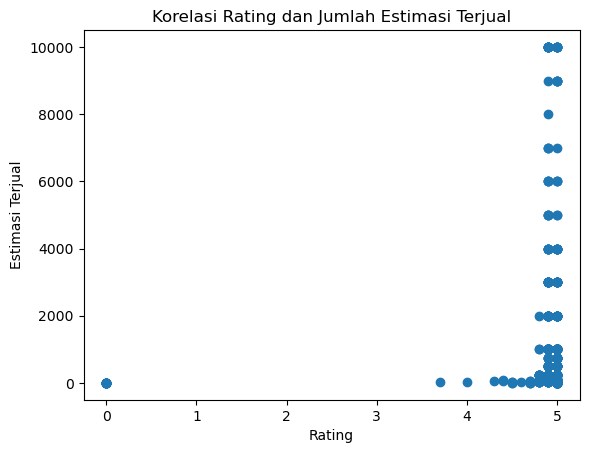

In [128]:
# create scatter plot
plt.scatter(Rating_dan_Terjual['Rating'], Rating_dan_Terjual['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Rating')
plt.ylabel('Estimasi Terjual')
plt.title('Korelasi Rating dan Jumlah Estimasi Terjual')

# display plot
plt.show()

#### G. Berapa Kelompok Harga dengan Penjualan Estimasi Tertinggi

In [26]:
Harga= df.loc[:, ['Nama Produk','Harga']] 

# Define a function to map ages to categories
def harga_to_category(Harga):
    if Harga <= 50000:
        return '<50000'
    elif 50000 < Harga <= 100000:
        return '50000-100000'
    elif 100000 < Harga <= 150000:
        return '100000-150000'
    elif 150000 < Harga <= 200000:
        return '150000-200000'
    elif 200000 < Harga <= 250000:
        return '200000-250000'
    elif 250000 < Harga <= 300000:
        return '250000-300000'
    elif 300000 < Harga <= 350000:
        return '300000-350000'
    elif 350000 < Harga <= 400000:
        return '350000-400000'
    elif 400000 < Harga <= 450000:
        return '400000-450000'
    elif 450000 < Harga <= 500000:
        return '450000-500000'
    elif 500000 < Harga <= 550000:
        return '500000-550000'
    elif 550000 < Harga <= 600000:
        return '550000-600000'
    elif 600000 < Harga <= 650000:
        return '600000-650000'
    elif 650000 < Harga <= 700000:
        return '650000-700000'
    elif 700000 < Harga <= 750000:
        return '700000-750000'
    elif 750000 < Harga <= 800000:
        return '750000-800000'
    elif Harga >= 800000:
        return '750000-800000'
    else:
        return 'Invalid'

# Create a new column 'category' based on 'age'
Harga['Kategori_Harga'] = df['Harga'].apply(harga_to_category)
#harga = harga.sort_values('Kategori_Harga', ascending=False)
Harga


,Nama Produk,Harga,Kategori_Harga
0,Kopi Arabika Aceh Gayo - Roasted Bean - 200 Gr...,46000,<50000
1,Kopi Arabika Aceh Gayo 1 KG - Commercial Grade...,160000,150000-200000
2,Kopi Robusta Aceh Gayo - Roasted Bean - 1 KG -...,104500,100000-150000
3,Kopi Arabika Ethiopia Yirgacheffe 200 gram Spe...,158000,150000-200000
4,Kopi [Biji/Bubuk] Arabika Aceh Gayo WINE Kuali...,78750,50000-100000
...,...,...,...
46642,Gayo Natural Single Estate Arabica 200g biji k...,86000,50000-100000
46643,Biji Kopi 100% Arabica ACEH GAYO Roasted Comme...,110000,100000-150000
46721,Kopi Robuta Dampit Malang 1 Kg (Biji/Bubuk),65000,50000-100000
46807,Kopi Luwak Liar ARABIKA Aceh Gayo ASLI biji ko...,159000,150000-200000


In [28]:
# Define a function to map ages to categories
def order(Kategori_Harga):
    if Kategori_Harga == '<50000':
        return 1
    elif Kategori_Harga == '50000-100000':    
        return 2
    elif Kategori_Harga == '100000-150000':
        return 3
    elif Kategori_Harga == '150000-200000':
        return 4
    elif Kategori_Harga == '200000-250000':
        return 5
    elif Kategori_Harga == '250000-300000':    
        return 6
    elif Kategori_Harga == '300000-350000':       
        return 7
    elif Kategori_Harga == '350000-400000':  
        return 8
    elif Kategori_Harga == '400000-450000':    
        return 9
    elif Kategori_Harga == '450000-500000':
        return 10
    elif Kategori_Harga == '500000-550000':
        return 11
    elif Kategori_Harga == '550000-600000':
        return 12
    elif Kategori_Harga == '600000-650000':
        return 13
    elif Kategori_Harga == '650000-700000':
        return 14
    elif Kategori_Harga == '700000-750000':
        return 15
    elif Kategori_Harga == '750000-800000':
        return 16
    elif Kategori_Harga == '>800000':
        return 17 

# Create a new column 'category' based on 'age'
Harga['Urutan'] = Harga['Kategori_Harga'].apply(order)
Harga = Harga.sort_values('Urutan', ascending=True)
Harga

,Nama Produk,Harga,Kategori_Harga,Urutan
0,Kopi Arabika Aceh Gayo - Roasted Bean - 200 Gr...,46000,<50000,1
41162,Kopi Bubuk Kapal Tanker Old - 780 Gr,48000,<50000,1
41081,Kopi Toraja Robusta 200g Murah untuk kopi hita...,27200,<50000,1
40247,Kopi Bubuk Murni Kopi Tubruk Robusta KUDA HITA...,34900,<50000,1
6254,Kopi Robusta Flores Bajawa Coffee Bean Espress...,29900,<50000,1
...,...,...,...,...
81,Kopi Arabika KENYA KIRINYAGA 1 Kg Specialty Co...,462000,450000-500000,10
48,Kopi Arabika Tanamera Coffee Sumatera: Mandail...,462000,450000-500000,10
4850,Kopi Arabika Ethiopia Yirgacheffe 1 KG Special...,502000,500000-550000,11
19169,Kona Coffee Hawaii 100% Peaberry Medium Roast ...,750000,700000-750000,15


In [30]:
Harga.to_csv('Rentang harga.csv', index=False, sep=';')

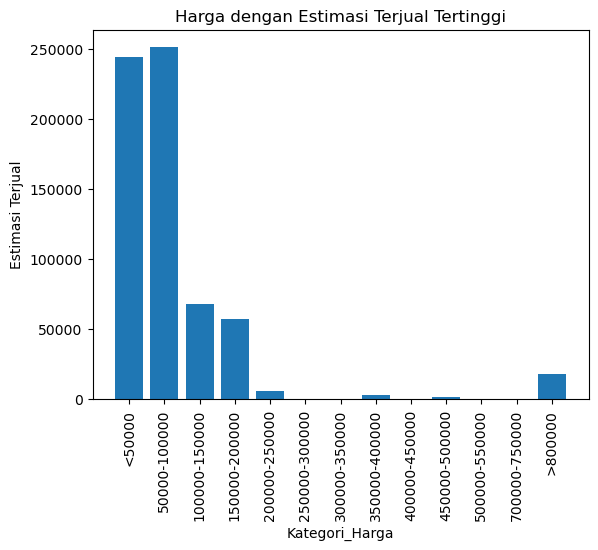

In [134]:
# create bar plot
plt.bar(Harga_sum['Kategori_Harga'], Harga_sum['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Kategori_Harga')
plt.ylabel('Estimasi Terjual')
plt.title('Harga dengan Estimasi Terjual Tertinggi')
plt.xticks(rotation=90)

# display plot
plt.show()

#### H. Korelasi Diskon dan Estimasi Penjualan

In [135]:
Diskon_dan_penjualan = df.loc[:, ['Nama Produk','Diskon', 'Estimasi Terjual']]
Diskon_dan_penjualan = Diskon_dan_penjualan.sort_values('Estimasi Terjual', ascending=False)
Diskon_dan_penjualan

,Nama Produk,Diskon,Estimasi Terjual
6227,Roasted Bean Premium Robusta Natural Tuang Cof...,17,10000
23407,ARUTALA Kopi Toraja Rantebua Robusta Coffee In...,20,10000
17,Kopi Aroma Mocca Arabika Bandung,0,10000
45661,Roasted Bean Primo Blend Tuang Coffee (Arabica...,31,10000
45656,Roasted Bean Premium Robusta Natural Tuang Cof...,13,10000
...,...,...,...
43617,Kopi Liberco Liberika Sambas 200gr Kopi Bubuk ...,0,0
37179,"kopi Robusta - fine, 500gram",0,0
37181,KOPI ROBUSTA 1KG,0,0
43580,Kopi Bubuk Blend Robusta & Liberika 250gr | Ko...,0,0


In [136]:
# Diskon_dan_penjualan.to_csv('Diskon dan Terjual.csv', index=False)

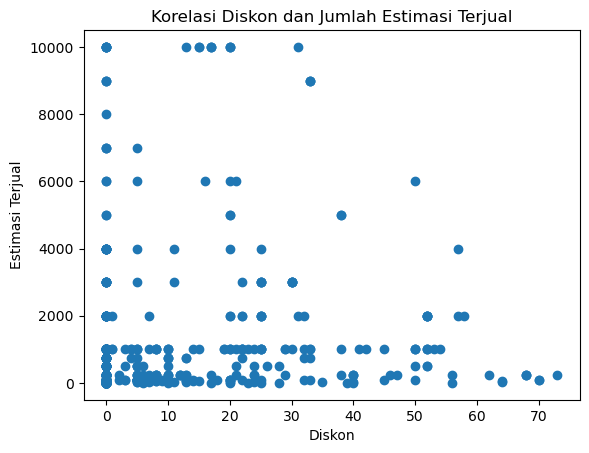

In [137]:
# create scatter plot
plt.scatter(Diskon_dan_penjualan['Diskon'], Diskon_dan_penjualan['Estimasi Terjual'])

# set axis labels and title
plt.xlabel('Diskon')
plt.ylabel('Estimasi Terjual')
plt.title('Korelasi Diskon dan Jumlah Estimasi Terjual')

# display plot
plt.show()